# Segmenting and Clustering Neighborhoods in Toronto
## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. **First Part : Scraping the postal codes from Wikipedia**
    
    

2. **Second part : Adding the the latitude and the longitude coordinates of each neighborhood**
    
    

3. **Third part : Clustering Neighborhoods in Toronto**
   
</font>
</div>


## 1. First Part : Scraping the postal codes from Wikipedia
We download the libraries that we will need

In [1]:
import numpy as np
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup

We define the target url

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
url

'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

We read the web page, and extract it as a 'lxml' file

In [4]:
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

We search the table onto the 'lxml' file

In [5]:
table = soup.find('table')

We then create a DataFrame from the above table

In [6]:
# We define the row
table_rows = table.find_all('tr')
l = []
# We iterate along the row
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
# We define the columns labels for the DataFrame
df = pd.DataFrame(l, columns=["PostalCode", "Borough", "Neighborhood"])
# We drop the '\n'
df["Neighborhood"] = df["Neighborhood"].str.strip('\n')
# We keep only the row for which the Borough have been assigned
df = df[df["Borough"] != 'Not assigned']
# We drop the first row 
df = df.iloc[1:,:].reset_index()[["PostalCode", "Borough", "Neighborhood"]]
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


We now clean and rearrange our DataFrame into a suitable form

In [21]:
# We group the Neighborhood by PostalCode
df = df.groupby(['PostalCode','Borough'])['Neighborhood'].apply(','.join).reset_index()
# We assign the name of the Borough for not assigned Neighborhoods
df[df['Neighborhood'] == 'Not assigned']['Neighborhood'] = df['Borough']
df.head(12)

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


In [8]:
print('The number of rows of the DataFrame is',df.shape[0])

The number of rows of the DataFrame is 103


## 2. Second part : Adding the the latitude and the longitude coordinates of each neighborhood
We first read the CSV file containing the geolocalisation data

In [22]:
df_geo.rename(columns={'Postal Code':'PostalCode'},inplace=True)
df_geo.head(12)

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [23]:
# We add the geolocalisation data to our DataFrame
df = df.merge(df_geo)
df.head(12)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


## 3. Third part : Clustering Neighborhoods in Toronto
We first install the package we will need

In [17]:
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [35]:
import folium
import requests
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="To_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [29]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{} - {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label).add_to(map_toronto)  
    
map_toronto

In [33]:
{
    "tags": [
        "hide_input",
    ]
}
CLIENT_ID = 'GL1YUN1NZ3UHNTJGK15C5BVCNQNEDIPVNOSPQW25D5KACW3J' # your Foursquare ID
CLIENT_SECRET = 'CZON05GDAADAAUYE3FLJYIX2VQVTJPEVWDZTVUT1TYDXCRK1' # your Foursquare Secret
VERSION = '20200229'
LIMIT = 30

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [37]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.shape

(100, 230)

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [56]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide,King,Richmond",Seafood Restaurant,Hotel,Sushi Restaurant,Asian Restaurant,Noodle House,Speakeasy,Pizza Place,Lounge,Café,Steakhouse
1,Agincourt,Breakfast Spot,Skating Rink,Lounge,Latin American Restaurant,Women's Store,Dim Sum Restaurant,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
2,"Agincourt North,L'Amoreaux East,Milliken,Steel...",Park,Playground,Deli / Bodega,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dog Run
3,"Albion Gardens,Beaumond Heights,Humbergate,Jam...",Grocery Store,Sandwich Place,Liquor Store,Discount Store,Fast Food Restaurant,Fried Chicken Joint,Pharmacy,Pizza Place,Beer Store,Japanese Restaurant
4,"Alderwood,Long Branch",Pizza Place,Skating Rink,Pub,Pool,Sandwich Place,Pharmacy,Gym,Coffee Shop,Drugstore,Dog Run


Text(0, 0.5, 'Standard deviation of cluster density')

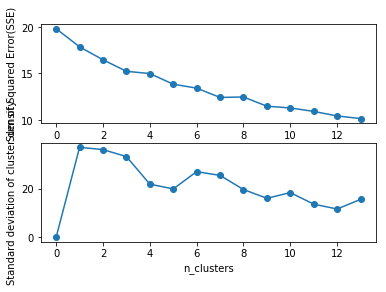

In [54]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

n_clusters_set = range(1,15)
k_means_intertias = []
stds = []

# find best k for k-means clustering
for n_clusters in n_clusters_set:
    kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(toronto_grouped_clustering)
    k_means_intertias.append(kmeans.inertia_)
    stds.append(np.std(np.bincount(kmeans.labels_)-int(100/n_clusters)))

plt.subplot(2,1,1)
plt.plot(k_means_intertias,'-o')
plt.xlabel('n_clusters')
plt.ylabel('Sum of Squared Error(SSE)')
plt.subplot(2,1,2)
plt.plot(stds,'-o')
plt.xlabel('n_clusters')
plt.ylabel('Standard deviation of cluster density')

From the Elbow Criterion, the optimal k seem to be 3, but for k=4 the samples seem to be more uniformly cluster 

In [61]:
kclusters = 4
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged['Cluster Labels'].replace(np.nan,0,inplace=True)# check the last columns!

## Neighborhood clustering visiualization

We show below the location of each neighborhood according to their cluster label

In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can see that there is no geographical clustering, indeed we have cluster the neighborhood according to the venue and not to the geolocatisation

## Neighborhood clustering analysis
Let us now analyze the **first** cluster 

We display below the top 10 most Common venue for the first 10th neighborhood which belongs to the **first** cluster

In [70]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].head(10)


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,0.0,Fast Food Restaurant,Farmers Market,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dog Run
1,Scarborough,0.0,Moving Target,Bar,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
2,Scarborough,0.0,Rental Car Location,Spa,Breakfast Spot,Electronics Store,Intersection,Mexican Restaurant,Medical Center,Women's Store,Empanada Restaurant,Eastern European Restaurant
3,Scarborough,0.0,Coffee Shop,Korean Restaurant,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
4,Scarborough,0.0,Bakery,Fried Chicken Joint,Caribbean Restaurant,Hakka Restaurant,Thai Restaurant,Athletics & Sports,Gas Station,Bank,Diner,Dessert Shop
6,Scarborough,0.0,Department Store,Coffee Shop,Hobby Shop,Bus Station,Discount Store,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store
7,Scarborough,0.0,Bus Line,Bakery,Park,Bus Station,Intersection,Metro Station,Ice Cream Shop,Soccer Field,Ethiopian Restaurant,Empanada Restaurant
8,Scarborough,0.0,American Restaurant,Motel,Women's Store,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
9,Scarborough,0.0,College Stadium,Café,Skating Rink,General Entertainment,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
10,Scarborough,0.0,Indian Restaurant,Light Rail Station,Brewery,Vietnamese Restaurant,Pet Store,Chinese Restaurant,Drugstore,Diner,Discount Store,Dog Run


It seem difficult to analyze it, indeed there is a lot of neighborhood in this cluster

We now display the **second** cluster

In [64]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].head()


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,North York,1.0,Baseball Field,Food Truck,Business Service,Women's Store,Farmers Market,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
91,Etobicoke,1.0,Baseball Field,Business Service,Women's Store,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
97,North York,1.0,Baseball Field,Women's Store,Dim Sum Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


Thus time it appear that this cluster contains the neighborhood with Baseball field

The **third** cluster, display below, contains the neighborhood with Park

In [65]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].head()


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,2.0,Park,Playground,Deli / Bodega,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dog Run
20,North York,2.0,Park,Martial Arts Dojo,Cafeteria,Dessert Shop,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
23,North York,2.0,Park,Convenience Store,Flower Shop,Bank,Dim Sum Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant
25,North York,2.0,Park,Food & Drink Shop,Dessert Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
30,North York,2.0,Park,Airport,Snack Place,Comfort Food Restaurant,Comic Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant


And finally, the **last** cluster, contains neighborhood with Playground

In [66]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].head()


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,3.0,Playground,Women's Store,Department Store,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore
48,Central Toronto,3.0,Tennis Court,Playground,Women's Store,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Dog Run
